In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom
from scipy import stats


In [2]:
datacovid = pd.read_csv('uts.csv', header=0)
datacovid.head(100)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,7,7,7,7,7,7,7,9,15
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,387,502,589,690,745,820,1054,1054,1133,1265
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,265,290,329,407,424,482,532,571,663,736
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,39,53,62,71,77,78,80,84,87,91
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389


In [3]:
datacovid.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.00000,258.000000,258.000000,258.000000,258.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,21.650595,22.847768,2.151163,2.534884,3.647287,5.55814,8.209302,11.344961,21.620155,23.899225,...,1812.608527,2052.678295,2299.577519,2560.875969,2791.151163,3032.422481,3323.593023,3614.748062,3926.965116,4247.740310
std,24.493626,71.075297,27.698003,27.797222,34.603643,48.15788,67.297895,90.671775,222.541377,223.892461,...,8665.997884,9791.516540,10966.228294,12259.479688,13470.806338,14794.069924,16425.853830,18058.577163,19916.495927,21909.309948
min,-41.454500,-135.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.641625,-18.093125,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,7.250000,11.000000,11.000000,11.250000,14.250000,15.000000,16.250000,19.000000,21.250000,22.000000
50%,23.659750,20.921188,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,88.500000,96.000000,104.000000,119.000000,135.500000,143.500000,149.500000,172.500000,183.000000,194.500000
75%,41.191625,83.437500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,443.000000,495.000000,567.250000,620.750000,653.000000,692.000000,736.250000,790.750000,897.000000,967.000000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.00000,1058.000000,1423.000000,3554.000000,3554.000000,...,74386.000000,83836.000000,101657.000000,121478.000000,140886.000000,161807.000000,188172.000000,213372.000000,243453.000000,275586.000000


In [4]:
datacovid.shape

(258, 77)

In [5]:
datacovid.isna().values.any() 
datacovid.duplicated().value_counts()

False    258
dtype: int64

In [6]:
datacovid['Country/Region'][71]

'China'

In [7]:
datacovid.loc[(datacovid['Country/Region'] == 'China') & (datacovid['Province/State'])].head(30)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,561,566,569,573,577,577,580,580,582,584
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,578,578,578,578,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,322,328,331,337,338,340,343,345,345,349
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,136,136,136,136,138,138,138,138,138,138
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1433,1448,1456,1467,1475,1484,1494,1501,1507,1514
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,319,319,319,319,319,321,321,323,325,326


In [8]:
datacovid.loc[(datacovid['Country/Region'] == 'Indonesia') & (datacovid['Province/State'])]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20


In [9]:
datacovid.iloc[71]

Province/State    Qinghai
Country/Region      China
Lat               35.7452
Long              95.9956
1/22/20                 0
1/23/20                 0
1/24/20                 0
1/25/20                 1
1/26/20                 1
1/27/20                 6
1/28/20                 6
1/29/20                 6
1/30/20                 8
1/31/20                 8
2/1/20                  9
2/2/20                 11
2/3/20                 13
2/4/20                 15
2/5/20                 17
2/6/20                 18
2/7/20                 18
2/8/20                 18
2/9/20                 18
2/10/20                18
2/11/20                18
2/12/20                18
2/13/20                18
2/14/20                18
2/15/20                18
2/16/20                18
                   ...   
3/5/20                 18
3/6/20                 18
3/7/20                 18
3/8/20                 18
3/9/20                 18
3/10/20                18
3/11/20                18
3/12/20     

In [10]:
datacovid['Country/Region'].describe()

count       258
unique      181
top       China
freq         33
Name: Country/Region, dtype: object

In [11]:
data = datacovid.loc[(datacovid['Province/State'] == 'Qinghai')]
data = data.drop('Province/State',axis=1)
data = data.drop('Country/Region',axis=1)
data = data.drop('Lat',axis=1)
data = data.drop('Long',axis=1)
data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
71,0,0,0,1,1,6,6,6,8,8,...,18,18,18,18,18,18,18,18,18,18


In [ ]:
data = sns.pairplot(data, hue="Qinghai Province")

In [12]:
datacovid['Country/Region'][132]

'Indonesia'

In [13]:
datacovid.loc[(datacovid['Country/Region'] == 'Indonesia')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
132,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,790,893,1046,1155,1285,1414,1528,1677,1790,1986


In [14]:
datacovid.iloc[132]

Province/State          NaN
Country/Region    Indonesia
Lat                 -0.7893
Long                113.921
1/22/20                   0
1/23/20                   0
1/24/20                   0
1/25/20                   0
1/26/20                   0
1/27/20                   0
1/28/20                   0
1/29/20                   0
1/30/20                   0
1/31/20                   0
2/1/20                    0
2/2/20                    0
2/3/20                    0
2/4/20                    0
2/5/20                    0
2/6/20                    0
2/7/20                    0
2/8/20                    0
2/9/20                    0
2/10/20                   0
2/11/20                   0
2/12/20                   0
2/13/20                   0
2/14/20                   0
2/15/20                   0
2/16/20                   0
                    ...    
3/5/20                    2
3/6/20                    4
3/7/20                    4
3/8/20                    6
3/9/20              

In [16]:
data1 = datacovid.loc[(datacovid['Country/Region'] == 'Indonesia')]
data1 = data1.drop('Province/State',axis=1)
data1 = data1.drop('Country/Region',axis=1)
data1 = data1.drop('Lat',axis=1)
data1 = data1.drop('Long',axis=1)
data1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
132,0,0,0,0,0,0,0,0,0,0,...,790,893,1046,1155,1285,1414,1528,1677,1790,1986


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

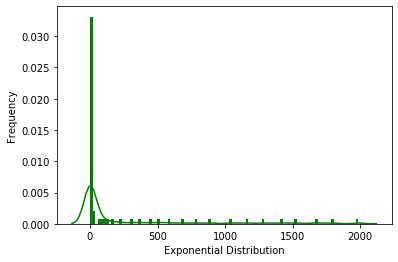

In [18]:
ax = sns.distplot(data1,
                  kde=True,
                  bins=100,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')